Test the downsampling. There seems to be something weird happening with it

In [10]:
import numpy as np
# --- centralms --- 
from centralms import util as UT
from centralms import catalog as Cat
from centralms import observables as Obvs

In [3]:
import corner as DFM
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [4]:
subhalo = Cat.CentralSubhalos(nsnap0=15)
shcat = subhalo.Read()

In [5]:
shcat_down = subhalo.Read(downsampled='20')

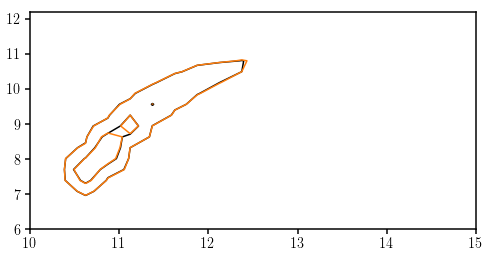

In [9]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(111)
DFM.hist2d(shcat['halo.m'], shcat['m.sham'], levels=[0.68, 0.95], 
           range=[[10., 15.],[6., 12.2]], color='k', 
           plot_datapoints=False, fill_contours=False, plot_density=False, ax=sub)
DFM.hist2d(shcat_down['halo.m'], shcat_down['m.sham'], 
           weights=shcat_down['weights'], levels=[0.68, 0.95], 
           range=[[10., 15.],[6., 12.2]], color='C1', 
           plot_datapoints=False, fill_contours=False, plot_density=False, ax=sub)

(1e-06, 0.1)

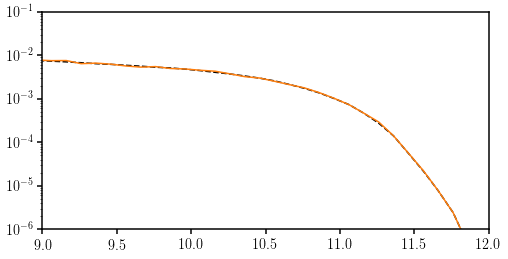

In [18]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(111)
msmf = Obvs.getMF(shcat['m.sham'], weights=shcat['weights'])
sub.plot(msmf[0], msmf[1], c='k', ls='--')
msmf = Obvs.getMF(shcat_down['m.sham'], weights=shcat_down['weights'])
sub.plot(msmf[0], msmf[1], c='C1')
sub.set_xlim([9., 12.])
sub.set_yscale("log")
sub.set_ylim([1e-6, 10**-1])